In [2]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 233.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 245.8 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 359.9 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 405.9 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/294.9 kB 445.2 kB/s eta 0:00:01
   ---------------------------------- --- 266.2/294.9 kB 629.0 kB/s eta 0:00:01
   ---------------------------------- --- 266.2/294.9 kB 629.0 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 551.7 kB/s eta 0:00:00
N


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Customer-Churn-Prediction.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**EDA**

In [6]:
df.shape

(7043, 21)

<Axes: xlabel='count', ylabel='Churn'>

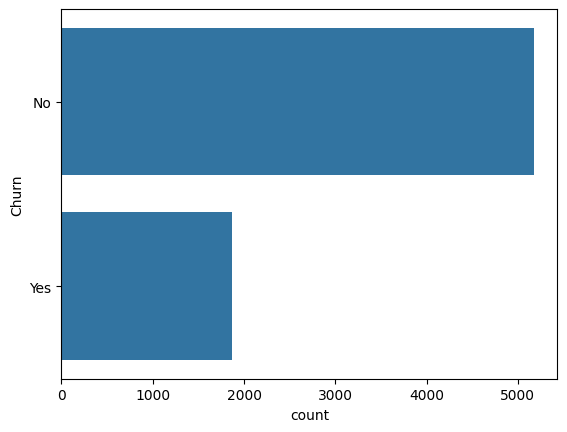

In [7]:
sns.countplot(df['Churn'])

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
churned = df[df.Churn =='Yes'].shape[0]
retained = df[df.Churn =='No'].shape[0]

In [11]:
#customer left the company
ch_per = ((churned/(churned+retained))*100)
ch_per

26.536987079369588

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Simple Visualization**

<Axes: xlabel='gender', ylabel='count'>

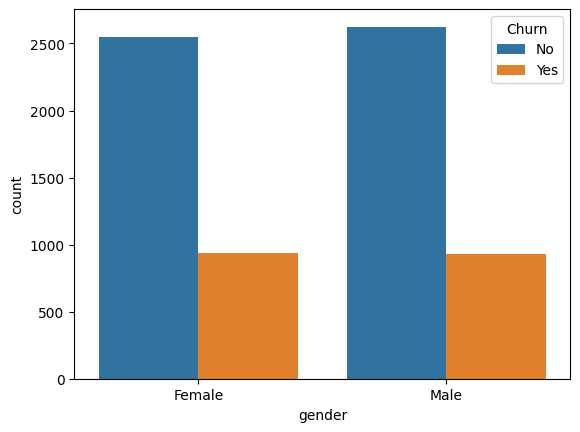

In [14]:
sns.countplot(x='gender', hue='Churn', data=df)

In [16]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

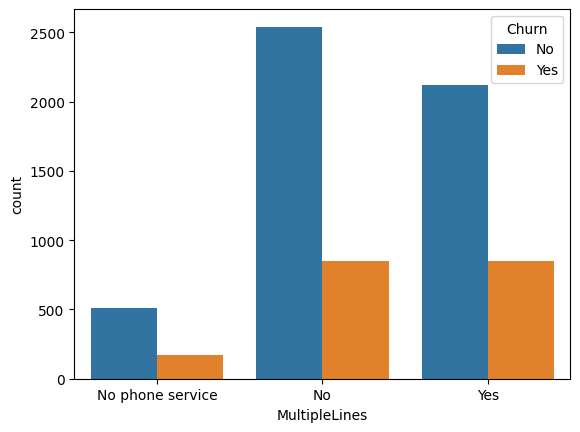

In [18]:
sns.countplot(x='MultipleLines', hue='Churn', data=df)

<Axes: xlabel='InternetService', ylabel='count'>

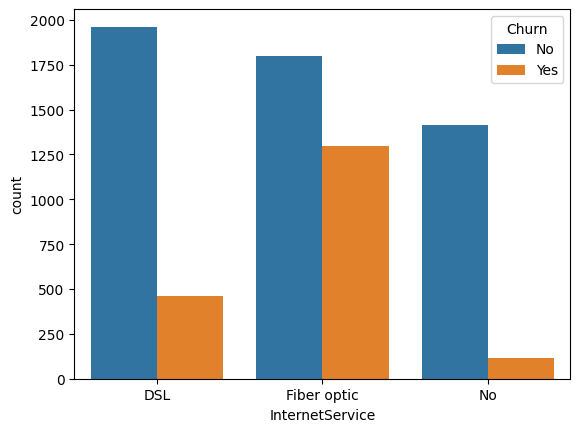

In [19]:
sns.countplot(x='InternetService', hue='Churn', data=df)

**Data Preprocessing**

In [20]:
from sklearn.preprocessing import LabelEncoder

In [26]:
for column in df.columns:
 # if df[column].dtype == np.number:
    #continue
   if np.issubdtype(df[column].dtype, np.number):
        continue
   df[column] = LabelEncoder().fit_transform(df[column])

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [ ]:
df = df.drop('customerID', axis=1)
#customerId is unnecessary here

In [27]:
x=df.drop('Churn',axis=1)
y=df['Churn']

**Scaling the Dataset**

In [ ]:
#Data ke nirdishto range e niye ashar jonno scaling
from sklearn.preprocessing import StandardScaler

In [29]:
feature_x=StandardScaler().fit_transform(x)

In [30]:
feature_x

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]], shape=(7043, 19))

**Splitting the Data**

In [31]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature_x,y,test_size=0.25,random_state=42)
xtest

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.32816441, -0.642709  ],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
        -1.31320824,  1.72841048],
       [-1.00955867, -0.44014635,  1.03453023, ...,  1.33486261,
        -1.50930029, -1.68953865],
       ...,
       [ 0.99053183, -0.44014635, -0.96662231, ..., -0.53774716,
         0.20401242, -0.89369395],
       [-1.00955867, -0.44014635, -0.96662231, ...,  0.39855772,
        -0.99912861,  0.94421487],
       [-1.00955867,  2.27197156, -0.96662231, ..., -0.53774716,
         0.30039665,  0.08588868]], shape=(1761, 19))

**Building Logistic Regression Model**

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
LogisticRegression()

LogisticRegression()

In [34]:
pred = model.predict(xtest)

In [35]:
pred.shape

(1761,)

**Performance Matrics**

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(ytest,pred)

0.8103350369108461

**Confusion Matrics**

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(ytest,pred)

array([[1163,  119],
       [ 215,  264]])

**Classification Report of Confusion Matrics**

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.69      0.55      0.61       479

    accuracy                           0.81      1761
   macro avg       0.77      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761

